Project 3: (10 points)
your total (50 points) will divided by 5 to get 10 points for this project.


In this project, we will focus on the preprocessing step before building the model.

We will prepare data before making a Market basket analysis, which is an algorithm originally designed to help retailers understand and improve their businesses.

Also, we will do some important preprocessing step before building an unsupervised model for Customer Segments.

### Market Basket Analysis
---
Imagine you work for a retailer that sells dozens of products and your boss comes to you and asks the following questions:

* What products are purchased together most frequently?
* How should the products be organized and positioned in the store?
* How do we identify the best products to discount via coupons?
---
##### You might reasonably respond with complete bewilderment, as those questions are very diverse and do not immediately seem answerable using a single algorithm and dataset. However, the answer to all those questions and many more is market basket analysis.
--
### Dataset:
you can find the dataset on Canvas under Dataset section: "Online Retail.xlsx"

### Steps to do:

1- Open a Jupyter notebook.

2- Install the following libraries, if not installed, and then import them:
* matplotlib.pyplot, which is used to plot the results of the models.
* mlxtend.frequent_patterns, which is used to run the models;
* mlxtend.preprocessing, which is used to encode and prep the data for the models;
* numpy, which is used to work with arrays;
* pandas, which is used to work with DataFrames.

In [ ]:
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy as np
import pandas as pd

3- Loading Data ( 1 point)

Load and view online retail dataset.Once you have downloaded the dataset, save it and note the path.

In [18]:
# write your code here
ORdf = pd.read_csv('OnlineRetail.csv')

4- Print out the first 10 rows of the DataFrame. ( 1 point)

Notice that the data contains some columns that will not be relevant to market basket analysis:

In [19]:
# write your code here
ORdf.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12-01-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12-01-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12-01-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12-01-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12-01-2010 08:34,1.69,13047.0,United Kingdom


5- Print out the data type for each column in the DataFrame. (1 point)

This information will come in handy when trying to perform specific cleaning tasks. Columns need to be of the correct type in order for filtering and computing to execute as expected:

In [21]:
# write your code here
print(ORdf.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


6- Get and print the dimensions of the DataFrame, as well as the number of unique invoice numbers and customer identifications (2 points)

In [22]:
# write your code here
print("Dataframe dimensions:", ORdf.shape)
print("Unique invoice numbers:", ORdf['InvoiceNo'].nunique())
print("Unique customer identifications:", ORdf['CustomerID'].nunique())

Dataframe dimensions: (145520, 8)
Unique invoice numbers: 7080
Unique customer identifications: 2223


7- Data Cleaning and Formatting:

a. Create an indicator column stipulating whether the invoice number begins with "C". Called the column "IsCPresent" ( 1 points)

In [23]:
# write your code here
ORdf['IsCPresent'] = ORdf['InvoiceNo'].astype(str).str.startswith('C')

In [25]:
ORdf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCPresent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,False


b. (3 points)
- Filter out all transactions having either zero or a negative number of items (in other words, items were returned),
- Remove all invoice numbers starting with "C" using the column created in previous step
- Subset the DataFrame down to InvoiceNo and Description
- Drop all rows with at least one missing value.
- Rename the DataFrame online1 and print out the first 10 rows of the filtered DataFrame, online1.

In [26]:
# write your code here

online1 = ORdf[(ORdf['Quantity']>0) & (~ORdf['IsCPresent'])][['InvoiceNo', 'Description']]

In [27]:
online1 = online1.dropna()

In [28]:
print(online1.head(10))

  InvoiceNo                          Description
0    536365   WHITE HANGING HEART T-LIGHT HOLDER
1    536365                  WHITE METAL LANTERN
2    536365       CREAM CUPID HEARTS COAT HANGER
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE
4    536365       RED WOOLLY HOTTIE WHITE HEART.
5    536365         SET 7 BABUSHKA NESTING BOXES
6    536365    GLASS STAR FROSTED T-LIGHT HOLDER
7    536366               HAND WARMER UNION JACK
8    536366            HAND WARMER RED POLKA DOT
9    536367        ASSORTED COLOUR BIRD ORNAMENT


c. Approximately, how many rows and invoice numbers have already removed? ( 2 points)

--
### Edit to write your answer here

In [31]:
#write your code here to prove your answer:
original_rows = ORdf.shape[0]
original_invoices = ORdf['InvoiceNo'].nunique()
updated_rows = online1.shape[0]
updated_invoices = online1['InvoiceNo'].nunique()
print("Rows removed: ", original_rows - updated_rows )
print("Invoices removed: ", original_invoices - updated_invoices)

Rows removed:  3234
Invoices removed:  1717


d. (2 points)
- Extract the invoice numbers from the DataFrame as a list.
- Remove duplicate elements to create a list of unique invoice numbers.
- Confirm that the process was successful by printing the length of the list of unique invoice numbers.

In [32]:
# write your code here
invoice_list = online1['InvoiceNo'].tolist()
unique_invoice = list(set(invoice_list))
print("Length of Unique Invoice List:", len(unique_invoice))

Length of Unique Invoice List: 5363


e. Take the list from step d and cut it to only include the first 5,000 elements. Print out the length of the new list to confirm that it is, in fact, the expected length of 5,000( 1 point)

In [33]:
# write your code here
invoices_5000 = unique_invoice[:5000]
print("Length of Invoice List after trim:", len(invoices_5000))

Length of Invoice List after trim: 5000


f. Filter the online1 DataFrame down by only keeping the invoice numbers in the list from step e and print out the first 10 rows of online1( 1 point)

In [34]:
# write your code here
online1 = online1[online1['InvoiceNo'].isin(invoices_5000)]
print(online1.head(10))

  InvoiceNo                          Description
0    536365   WHITE HANGING HEART T-LIGHT HOLDER
1    536365                  WHITE METAL LANTERN
2    536365       CREAM CUPID HEARTS COAT HANGER
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE
4    536365       RED WOOLLY HOTTIE WHITE HEART.
5    536365         SET 7 BABUSHKA NESTING BOXES
6    536365    GLASS STAR FROSTED T-LIGHT HOLDER
7    536366               HAND WARMER UNION JACK
8    536366            HAND WARMER RED POLKA DOT
9    536367        ASSORTED COLOUR BIRD ORNAMENT


g. Print out the dimensions of the DataFrame (online1) and the number of unique invoice numbers to confirm that the filtering and cleaning process was successful (1 point)

In [35]:
# write your code here
print("Filtered dataframe dimensions:", online1.shape)
print("Unique Invoice numbers in filtered data:", online1['InvoiceNo'].nunique())

Filtered dataframe dimensions: (134027, 2)
Unique Invoice numbers in filtered data: 5000


h. Transform the data in online1 into the aforementioned list of lists called invoice_item_list. The process for doing this is to iterate over the unique invoice numbers and, at each iteration, extract the item descriptions as a list and append that list to the larger invoice_item_list list. Print out elements one through four of the list (2 points)

In [39]:
# write your code here
invoice_item_list = []
for invoice in invoices_5000:
    items = online1[online1['InvoiceNo'] == invoice]['Description'].tolist()
    invoice_item_list.append(items)
print("Elements 1 to 4 of invoice_item_list:")
print(invoice_item_list[1:5])

Elements 1 to 4 of invoice_item_list:
[['ENAMEL FLOWER JUG CREAM', 'ENAMEL BREAD BIN CREAM', 'ENAMEL WATERING CAN CREAM', 'ENAMEL COLANDER CREAM', 'ENAMEL WASH BOWL CREAM', 'PACK OF 20 NAPKINS PANTRY DESIGN', 'SET OF 3 BUTTERFLY COOKIE CUTTERS', 'RECIPE BOX PANTRY YELLOW DESIGN', 'FELTCRAFT DOLL EMILY', 'FELTCRAFT CUSHION RABBIT', 'BAKING SET 9 PIECE RETROSPOT ', 'MAKE YOUR OWN MONSOON CARD KIT', 'RED METAL BEACH SPADE ', 'GIRLS VINTAGE TIN SEASIDE BUCKET', 'SET 3 PAPER VINTAGE CHICK PAPER EGG', 'JAM MAKING SET WITH JARS', 'SET OF 3 CAKE TINS PANTRY DESIGN ', 'HOMEMADE JAM SCENTED CANDLES', 'GINGERBREAD MAN COOKIE CUTTER', 'SET OF 6 SPICE TINS PANTRY DESIGN', '3 TRADITIONAL COOKIE CUTTERS  SET'], ['TEA PARTY BIRTHDAY CARD', 'SPACEBOY GIFT WRAP', 'ROBOT BIRTHDAY CARD', 'CARD BIRTHDAY COWBOY', 'CARD CIRCUS PARADE', 'VINTAGE SNAP CARDS', 'COWBOYS AND INDIANS BIRTHDAY CARD ', 'VINTAGE HEADS AND TAILS CARD GAME ', 'VINTAGE KID DOLLY CARD ', 'SET OF 20 KIDS COOKIE CUTTERS', 'SPACEBOY BIRTHDA

8- Data Encoding

While cleaning the data is crucial, the most important part of the data preparation process is molding the data into the correct form. Before running the models, the data, currently in the list of lists form, needs to be encoded and recast as a DataFrame.

To do this, we will leverage TransactionEncoder from the preprocessing module of mlxtend. The output from the encoder is a multidimensional array, where each row is the length of the total number of unique items in the transaction dataset and the elements are Boolean variables, indicating whether that particular item is linked to the invoice number that row represents. With the data encoded, we can recast it as a DataFrame where the rows are the invoice numbers and the columns are the unique items in the transaction dataset.

The data encoding will be done using mlxtend, but if you wish to encode the data without using a package, you are free.

More info about mlxtend in the link: https://rasbt.github.io/mlxtend/

a. Initialize and fit the transaction encoder. Print out an example of the resulting data. (2 points)

In [40]:
# write your code here
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(invoice_item_list).transform(invoice_item_list)
print("Example of resulting data:")
print(te_ary[:5])

Example of resulting data:
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


b. Recast the encoded array as a DataFrame named online_encoder_df. Print the predefined subset of the DataFrame that features both True and False values (2 points)

In [41]:
# write your code here
online_encoder_df = pd.DataFrame(te_ary, columns=te.columns_)
print("Predefined Subset of Encoded dataframe:")
print(online_encoder_df.iloc[:5, :10])

Predefined Subset of Encoded dataframe:
    4 PURPLE FLOCK DINNER CANDLES   OVAL WALL MIRROR DIAMANTE   \
0                           False                        False   
1                           False                        False   
2                           False                        False   
3                           False                        False   
4                           False                        False   

    SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
0                             False                    False   
1                             False                    False   
2                             False                    False   
3                             False                    False   
4                             False                    False   

   *Boombox Ipod Classic  *USB Office Mirror Ball  10 COLOUR SPACEBOY PEN  \
0                  False                    False                   False   
1                  False

c. Print out the dimensions of the encoded DataFrame. It should have 5,000 rows because the data used to generate it was previously filtered down to 5,000 unique invoice numbers. (1 point)

In [42]:
# write your code here
print("Encoded dataframe dimensions:", online_encoder_df.shape)

Encoded dataframe dimensions: (5000, 3127)


#### The data is now prepared for modeling.
---

### Wholesale Data

we will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

--
### Dataset:
you can find the dataset on Canvas under Dataset section: "wholesale_customers_data.csv"

In [43]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.random import uniform, multivariate_normal, rand, randn, seed
from itertools import repeat
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib.colors import to_rgba
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import jarque_bera, normaltest
import matplotlib.pyplot as plt
import scipy.stats as stats


1. Load the wholesale customers dataset (1 point)

In [44]:
# write your code here
wholesale_df = pd.read_csv('wholesale_customers_data.csv')

In [45]:
wholesale_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


2. Drop Channel & Region and print the current columns ( 1 point)

In [46]:
# write your code here
wholesale_df = wholesale_df.drop(['Channel', 'Region'], axis=1)
print("Current Columns:", wholesale_df.columns.tolist())

Current Columns: ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']


### Data Exploration:

You will begin exploring the data through visualizations and code to understand how each feature is related to the others.



3. Show a statistical summary for each of the above product categories. (1 point)

In [47]:
# write your code here
wholesale_df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


4. Show a visual representation of the distribution of each feature in the data.using histogram and normal probability plot. (2 points)

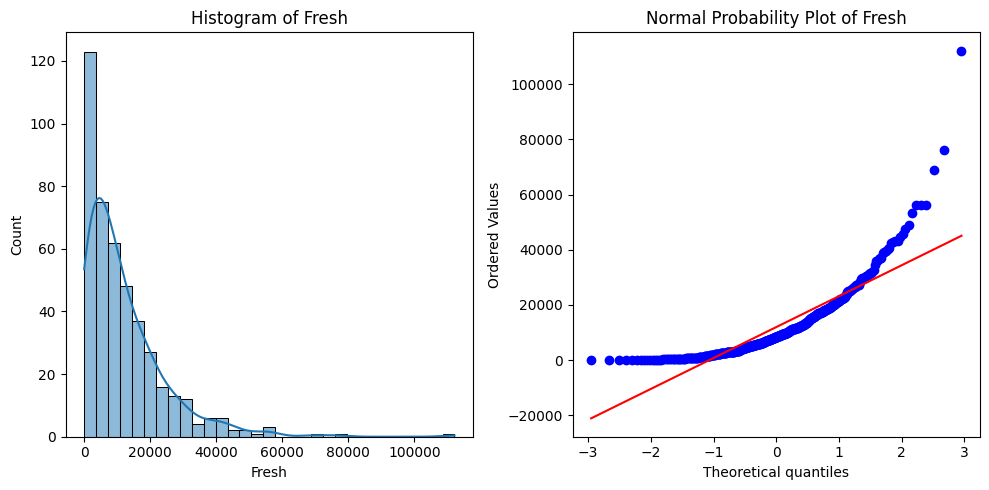

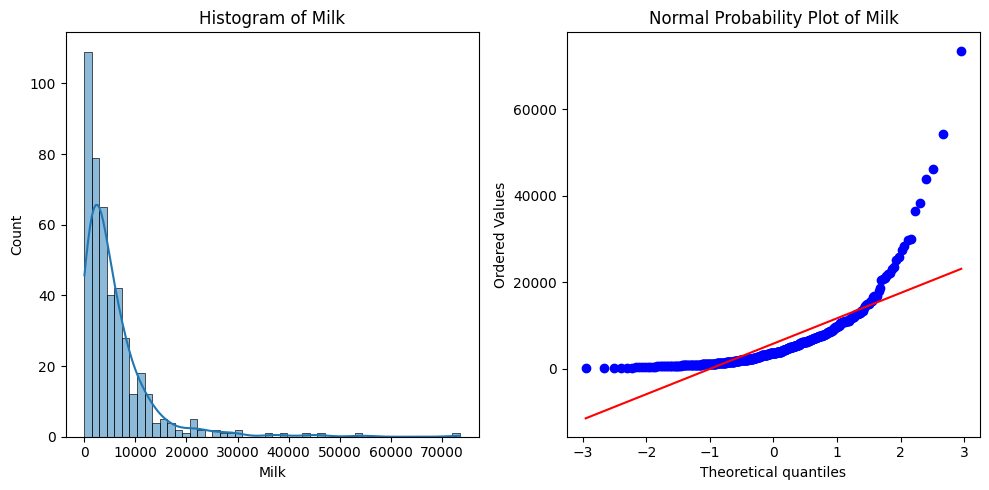

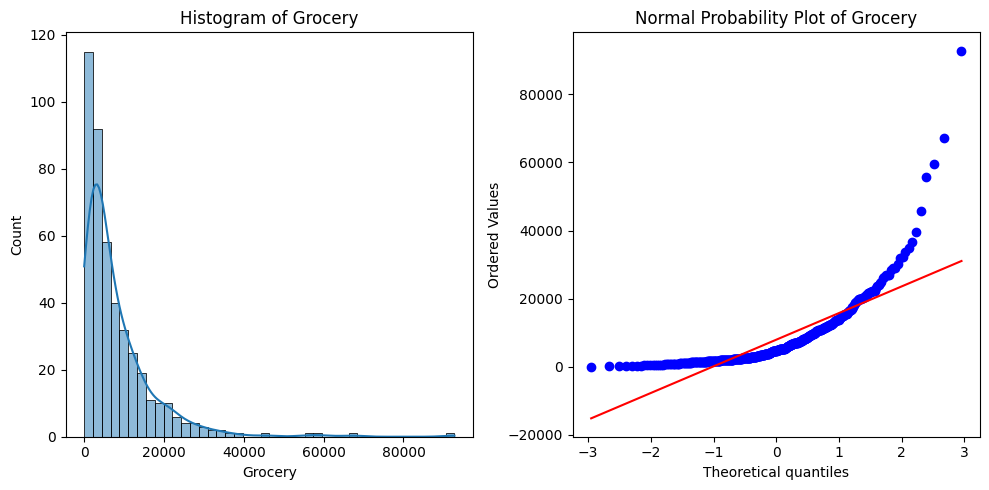

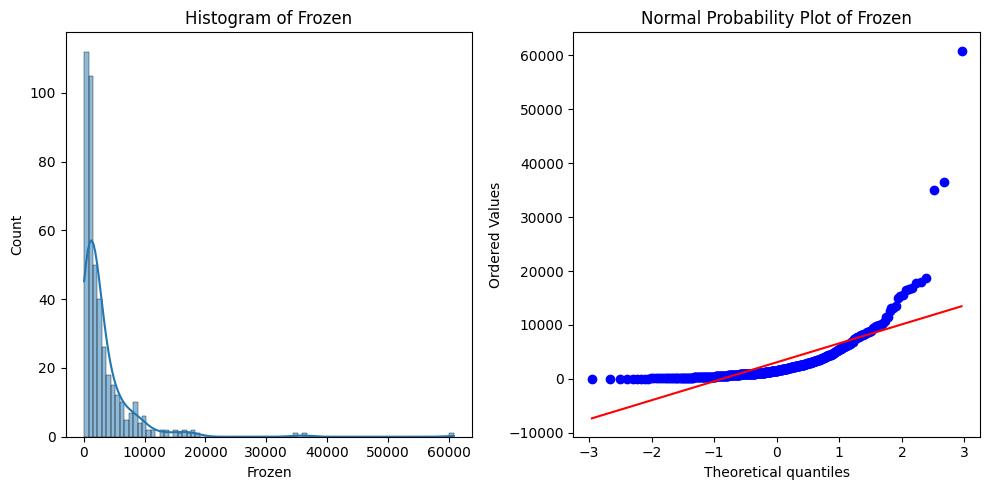

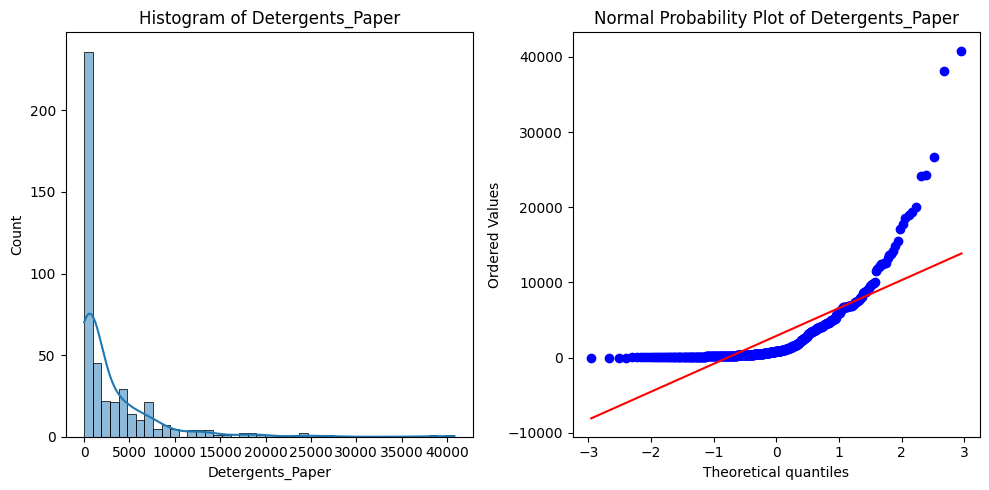

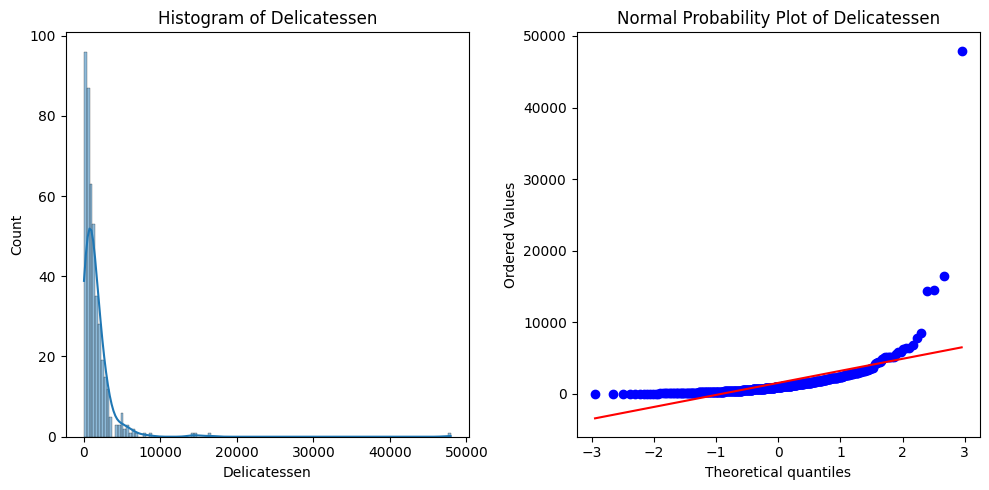

In [51]:
# write your code here

# Loop through columns and create plots
for column in wholesale_df.columns:
    plt.figure(figsize=(10, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(wholesale_df[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Normal probability plot
    plt.subplot(1, 2, 2)
    stats.probplot(wholesale_df[column], dist="norm", plot=plt)
    plt.title(f'Normal Probability Plot of {column}')

    plt.tight_layout()
    plt.show()

5. What do you observe about distribution? (2 points)


**Fresh:**
The histogram shows a distribution that is strongly skewed to the right.Most of the data points are clustered towards the lower values.
The normal probability plot shows a clear upward curve. This indicates a significant deviation from normality, confirming the right skew observed in the histogram.

**Milk:**
the histogram for Milk also exhibits a right-skewed distribution, although perhaps slightly less extreme.
The normal probability has the points deviate upwards from the straight line, suggesting that the Milk data is not normally distributed and has a positive skew.

**Grocery:**
The histogram for Grocery is also right-skewed. A large number of observations are in the lower value range, with fewer observations as the values increase.
The histogram for Grocery is also right-skewed. A large number of observations are in the lower value range, with fewer observations as the values increase.

**Frozen:**
The histogram for Frozen appears right-skewed, with a peak at lower values and a tail extending towards higher values.
The normal probability plot shows a noticeable upward curve, suggesting that the Frozen data is not normally distributed and has a positive skew.

**Detergent paper:**
The histogram for Detergents_Paper is strongly right-skewed. The vast majority of the data points are concentrated at the lower end of the distribution.
The normal probability plot shows a very steep upward curve. This strongly suggests a significant positive skew and a clear deviation from a normal distribution.

**Delicatessen:**
The histogram for Delicatessen also shows a right-skewed distribution, with most values concentrated at the lower end and a tail extending to the right.
The normal probability plot exhibits an upward curve, indicating a deviation from normality and a positive skew in the Delicatessen data.

6. Scale the sample data using the natural logarithm ( 1 point)

In [50]:
# Scale the data using the natural logarithm
wholesale_log = np.log1p(wholesale_df)
print(wholesale_log.head())

       Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   9.446992  9.175438  8.930891  5.370638          7.891705      7.199678
1   8.861917  9.191259  9.166284  7.474772          8.099858      7.482682
2   8.756840  9.083529  8.947026  7.785721          8.165364      8.967632
3   9.492960  7.087574  8.348064  8.764834          6.230481      7.489412
4  10.026413  8.596189  8.881697  8.272826          7.483244      8.553718


7. Check for Outliers using boxplot ( 2 points)

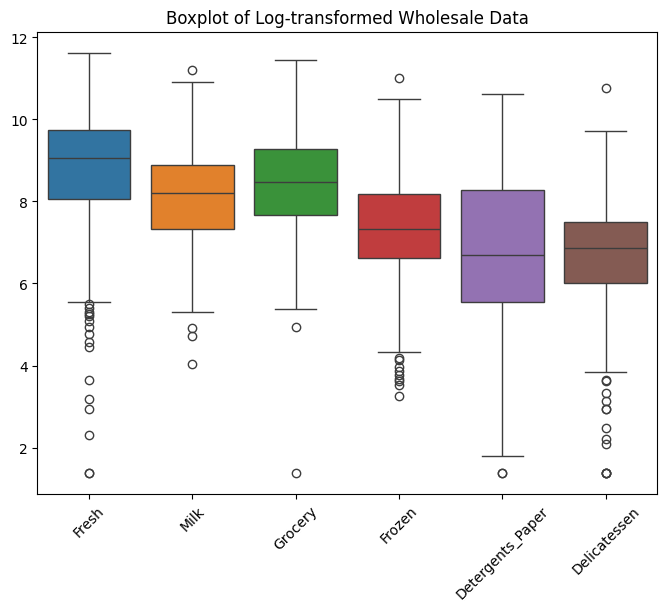

In [53]:
# write your code here
plt.figure(figsize=(8, 6))
sns.boxplot(data=wholesale_log)
plt.title('Boxplot of Log-transformed Wholesale data')
plt.xticks(rotation=45)
plt.show()

8. Apply natural log to transform long tails and plot the Log Sales Distribution using violinplot (2 points)

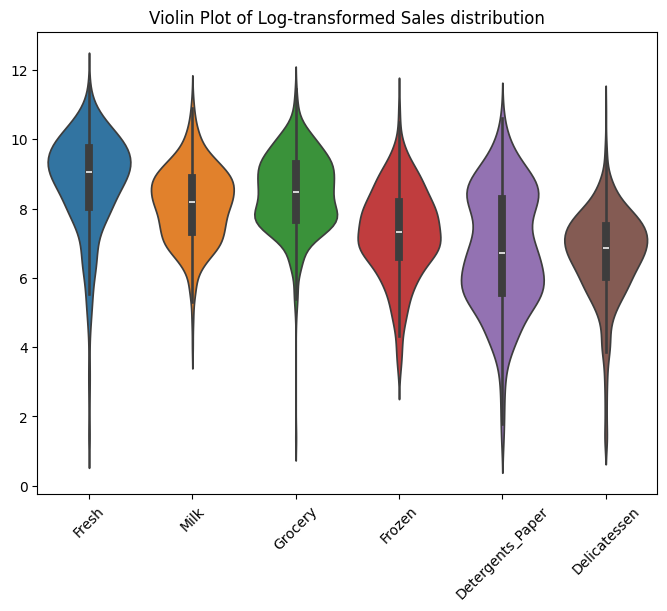

In [54]:
# write your code here
plt.figure(figsize=(8, 6))
sns.violinplot(data=wholesale_log)
plt.title('Violin Plot of Log-transformed Sales distribution')
plt.xticks(rotation=45)
plt.show()

9. Remove Outliers using LocalOutlierFactor and plot the Log Sales Distribution using violinplot after removing the outliers. (2 points)

In [55]:
# write your code here
lof = LocalOutlierFactor(n_neighbors=20)
outlier_labels = lof.fit_predict(wholesale_log)
wholesale_clean = wholesale_log[outlier_labels == 1]
print("Dimensions after outlier removal:", wholesale_clean.shape)

Dimensions after outlier removal: (407, 6)


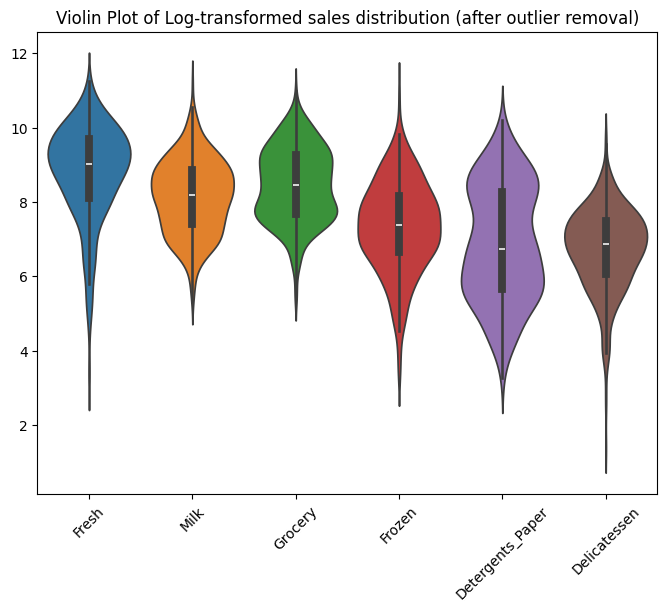

In [56]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=wholesale_clean)
plt.title('Violin Plot of Log-transformed sales distribution (after outlier removal)')
plt.xticks(rotation=45)
plt.show()

10. use sns.pairplot to visualize Feature Distributions in your cleaned data (2 points)

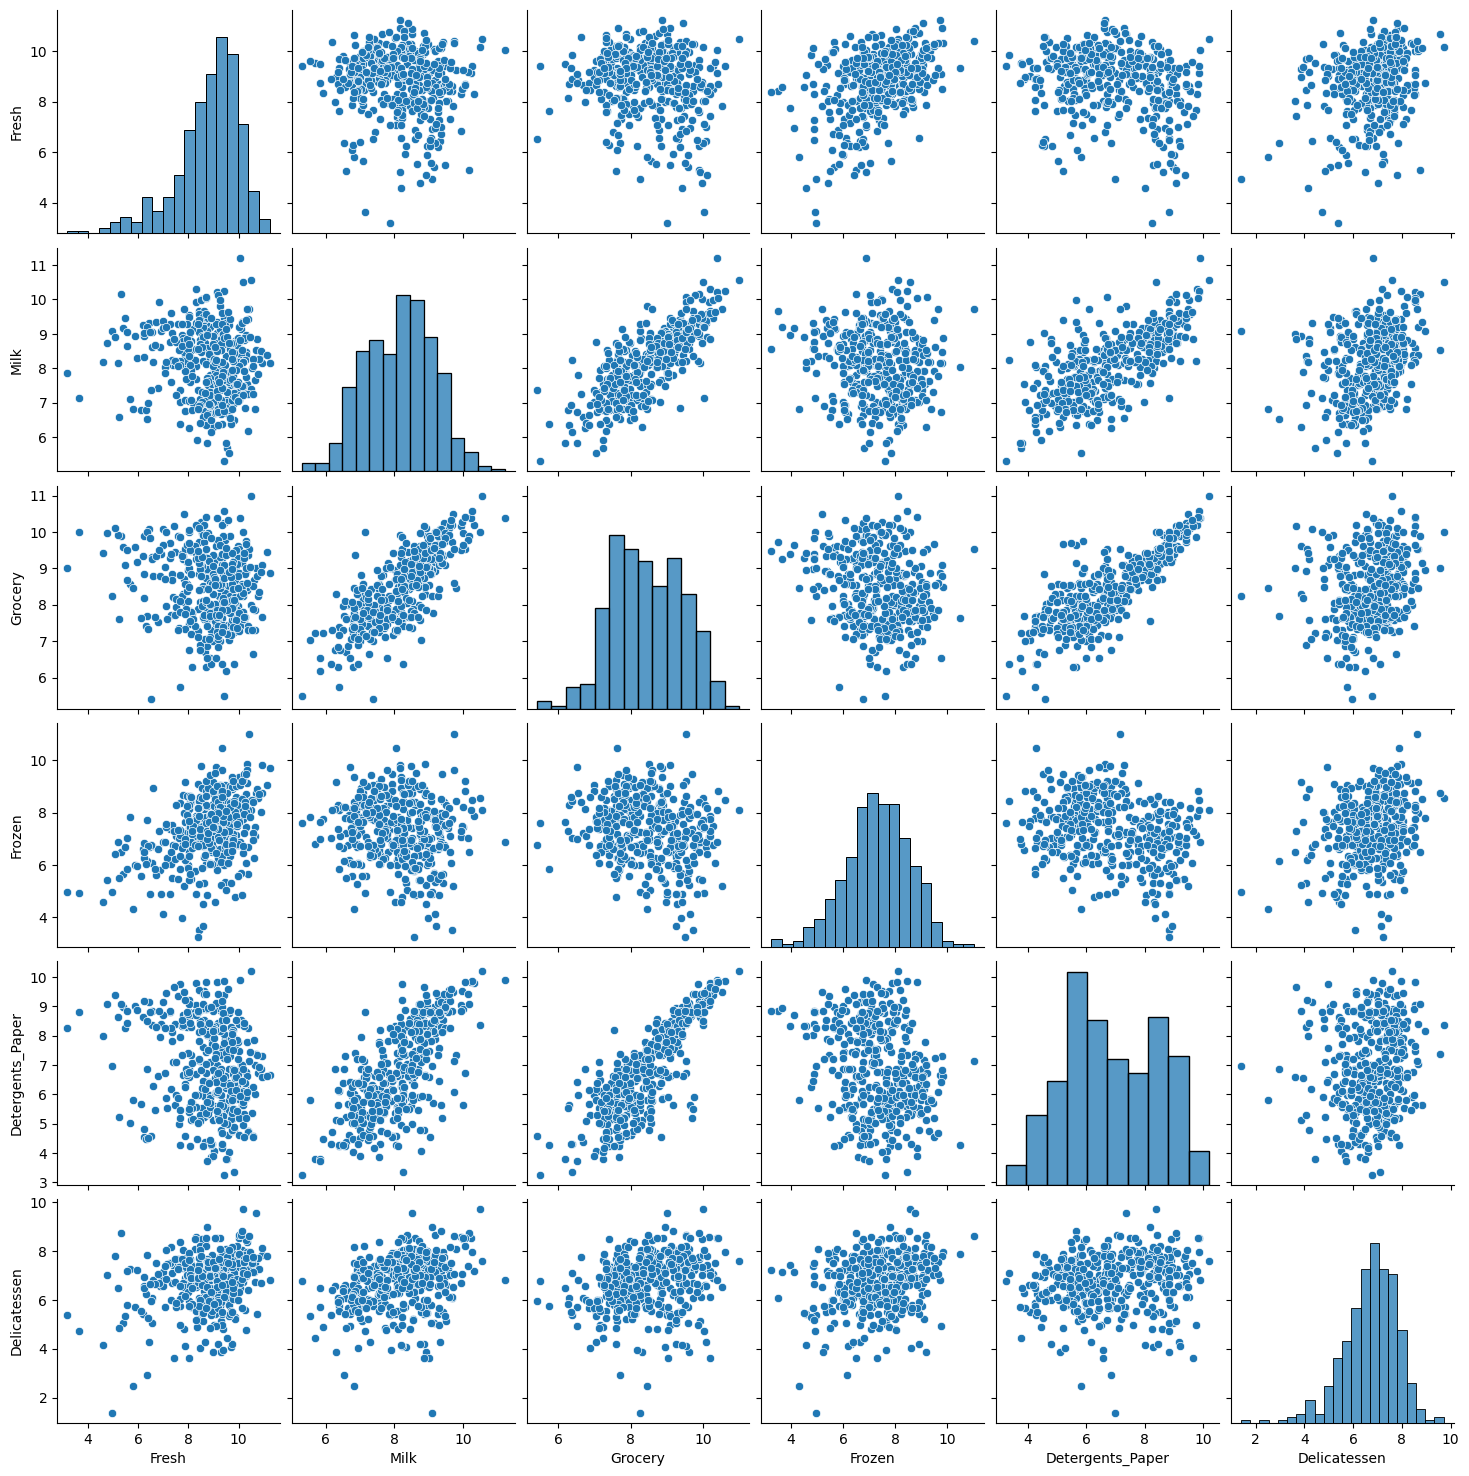

In [57]:
# write your code here
sns.pairplot(wholesale_clean)
plt.show()

11. Check for Correlations using sns.clustermap (2 points)

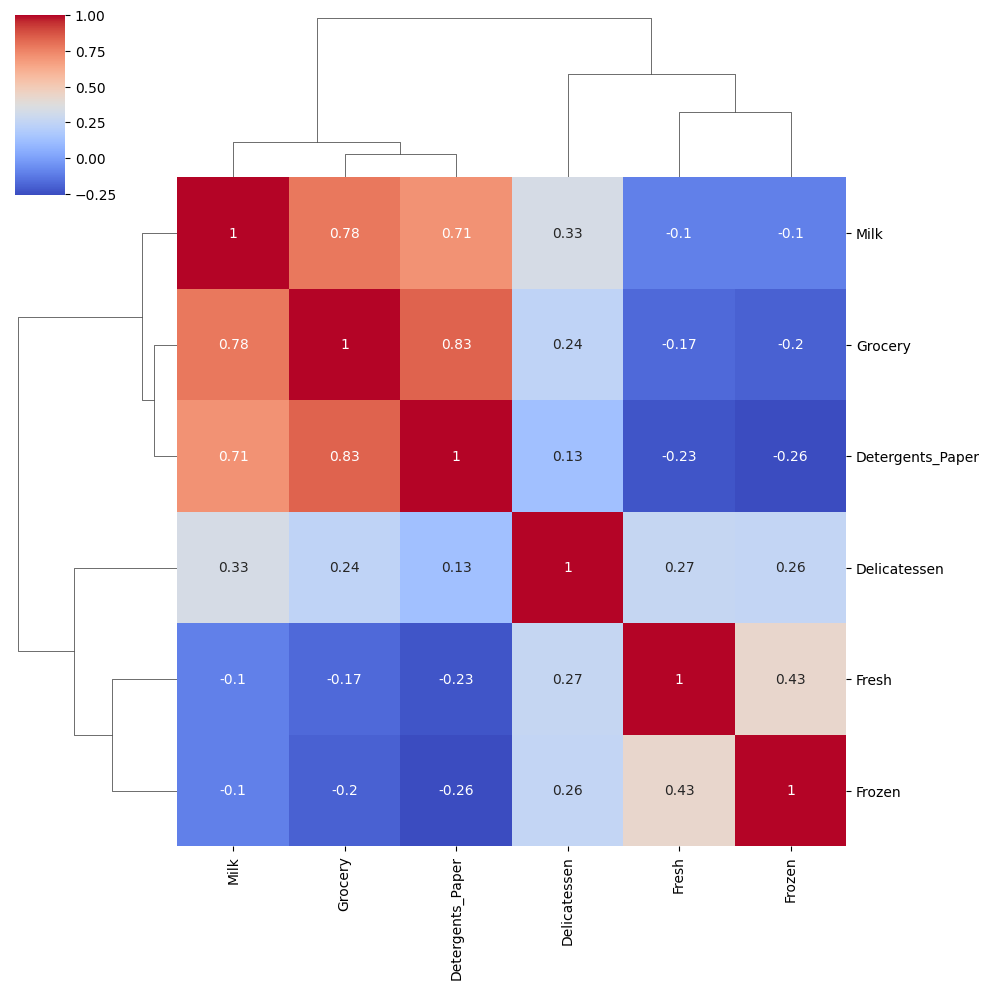

In [58]:
# write your code here
sns.clustermap(wholesale_clean.corr(), annot=True, cmap='coolwarm')
plt.show()

12. What do you observe? (2 points)


From above correlation it appear to be natural groupings in purchasing behavior like Milk, Grocery, and Detergents_Paper spendings kind of move together.
*   Grocery and Detergents_Paper (0.83): This shows a very strong positive correlation. It's likely that customers who buy more groceries also tend to purchase more detergents and paper products.
*   Milk and Grocery (0.78): There's a strong positive correlation between the spending on Milk and Grocery.
*   Fresh and Frozen (0.43): There's a moderate positive correlation between Fresh and Frozen product spending.
*   Milk with Fresh (-0.1) and Frozen (-0.1): There are weak negative correlations between Milk and both Fresh and Frozen products. This implies a very slight tendency for customers who spend more on milk to spend a little less on fresh and frozen items.
*   Grocery with Fresh (-0.17) and Frozen (-0.2): Similar to Milk, Grocery spending also shows weak negative correlations with Fresh and Frozen products.







### PCA
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the cleaned data to discover which dimensions about the data best maximize the variance of features involved.

13. Biplot: Visualizing Product Relationships in 2D (2 points)

Text(0.5, 1.0, 'PCA Biplot')

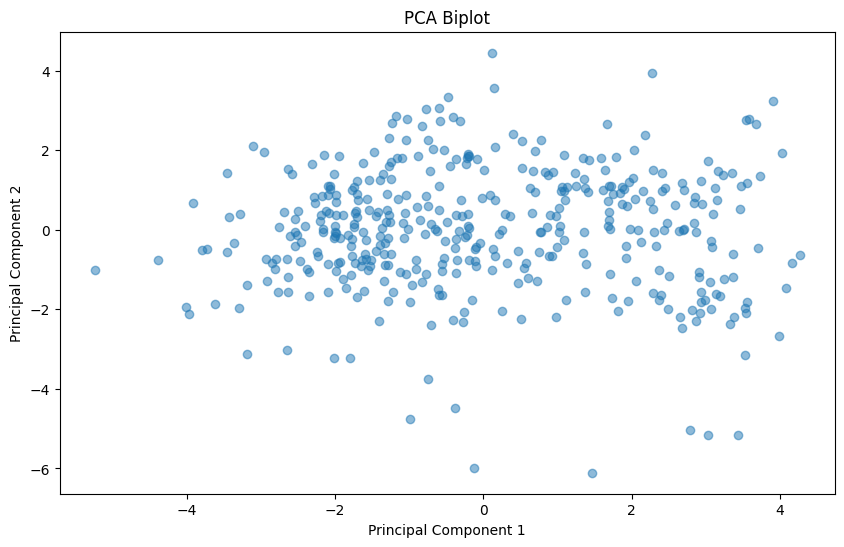

In [59]:
# write your code here
pca = PCA(n_components=2)
principal_components = pca.fit_transform(wholesale_clean)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
plt.figure(figsize=(10, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')

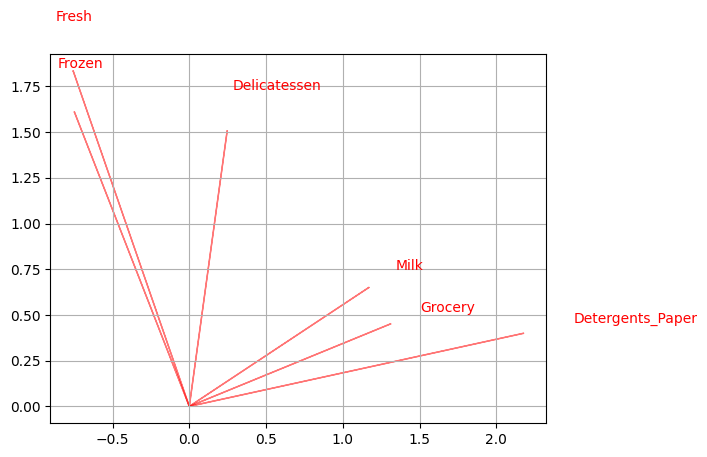

In [60]:
components = pca.components_.T * 3
for i, feature in enumerate(wholesale_clean.columns):
    plt.arrow(0, 0, components[i, 0], components[i, 1], color='r', alpha=0.5)
    plt.text(components[i, 0] * 1.15, components[i, 1] * 1.15, feature, color='r')
plt.grid()
plt.show()

14. Use sns.jointplot to plot x and y in the above code (2 points)

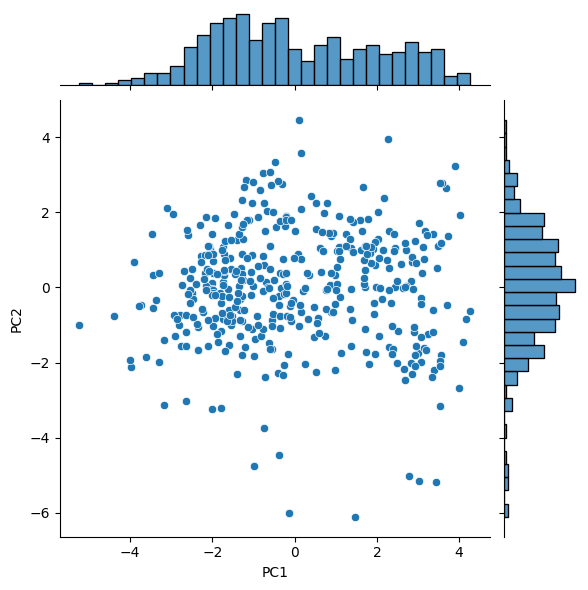

In [61]:
# write your code here
sns.jointplot(x='PC1', y='PC2', data=pc_df, kind='scatter', marginal_kws=dict(bins=30, fill=True))
plt.show()

15. Exploring the new Descriptors of the cleand Data using plot.bar (2 points)

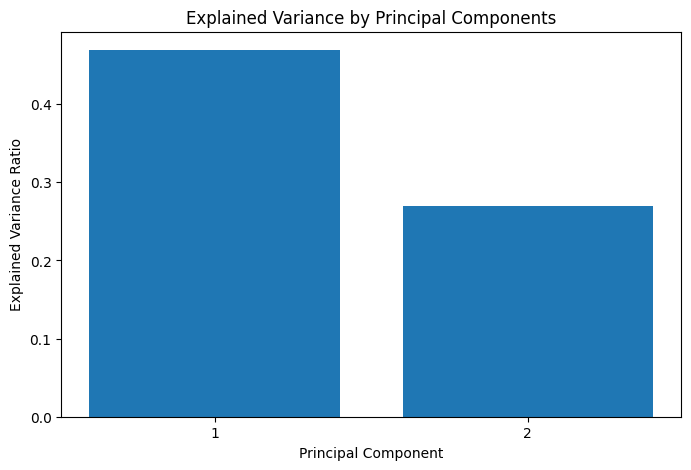

In [62]:
# write your code here
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.xticks([1, 2])
plt.show()

16. How much approximately the first and second features of explain of variance in total? (1 point)



The first principal component '1' on the x-axis explains approx., 0.47 (47%) of the total variance in the data.
The second principal component '2' on the x-axis explains approx, 0.27 (27%) of the total variance in the data.


Total explained variance by the first and second features: 0.47 + 0.27 = **0.74.**


---
## All set

Please make sure you execute each cell before you submit your file; this is important because if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue.

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_3 .
---